# 🇮🇳 Smart Categorization & Tagging Engine
### India-First Transaction Intelligence System

**Features:**
- 🏪 India Merchant Dictionary (50,000+ merchants, seeded with 200+)
- 🧠 ML Categorization + Contextual Reclassification (learns from corrections)
- ✂️ Split Transaction Handling (Amazon multi-item orders)
- 🏷️ Custom Category Builder (Wedding Fund, Side Business, etc.)
- 💡 Merchant Enrichment (logo, charge type, business type)

---

## 📦 Step 1: Install Dependencies

In [1]:
!pip install scikit-learn pandas numpy --quiet
print('✅ Dependencies installed')

✅ Dependencies installed


## 📁 Step 2: Clone / Mount the Project

> **Option A**: Clone from GitHub (after you push this code)
> **Option B**: Mount Google Drive (recommended for persistence)
> **Option C**: Upload files directly (for quick testing)

In [2]:
import os, sys

# ─── OPTION A: GitHub ──────────────────────────────────────────────────
# !git clone https://github.com/YOUR_USERNAME/smart-categorization.git
# sys.path.insert(0, '/content/smart-categorization')

# ─── OPTION B: Google Drive (recommended for persistence) ─────────────
# from google.colab import drive
# drive.mount('/content/drive')
# PROJECT_PATH = '/content/drive/MyDrive/smart_categorization'
# sys.path.insert(0, PROJECT_PATH)

# ─── OPTION C: Direct Upload ───────────────────────────────────────────
# from google.colab import files
# uploaded = files.upload()

# ─── OPTION D: Load inline (for self-contained demo) ──────────────────
PROJECT_PATH = '/content/smart_categorization'
sys.path.insert(0, PROJECT_PATH)
os.makedirs(f'{PROJECT_PATH}/core', exist_ok=True)
os.makedirs(f'{PROJECT_PATH}/data', exist_ok=True)

print('📁 Project path:', PROJECT_PATH)

📁 Project path: /content/smart_categorization


## 🚀 Step 3: Initialize the Pipeline

In [3]:
import os, sys, tempfile

# ── Auto-detect project path ──────────────────────────────────────
# Works whether you're running locally or on Colab
PROJECT_PATH = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
if PROJECT_PATH not in sys.path:
    sys.path.insert(0, PROJECT_PATH)

from core.pipeline import SmartCategorizationPipeline, Transaction

# Initialize — NO hardcoded paths needed.
# Paths auto-resolve via tempfile.gettempdir() on any OS.
pipeline = SmartCategorizationPipeline()

print('✅ Pipeline initialized!')
print('   Temp dir:', tempfile.gettempdir())


🔧 Initializing Smart Categorization Pipeline...
✅ Pipeline ready!
✅ Pipeline initialized!
   Temp dir: C:\Users\hp\AppData\Local\Temp


## 🧪 Step 4: Test with Sample Indian Transactions

In [4]:
# Realistic Indian bank statement transactions
sample_transactions = [
    Transaction('TXN001', '2024-01-15', 'ZOMATO ORDER #789456', 450.0),
    Transaction('TXN002', '2024-01-15', 'NETFLIX SUBSCRIPTION JAN', 649.0),
    Transaction('TXN003', '2024-01-16', 'AMAZON PAY PURCHASE - MOBILE HEADPHONES SHIRT GROCERY', 3200.0),
    Transaction('TXN004', '2024-01-16', 'UBER INDIA TRIP BANGALORE', 280.0),
    Transaction('TXN005', '2024-01-17', 'AIRTEL PREPAID RECHARGE', 499.0),
    Transaction('TXN006', '2024-01-17', 'BIGBASKET ORDER VEGETABLES FRUITS RICE', 1200.0),
    Transaction('TXN007', '2024-01-18', 'IRCTC TKT PNR 4567890123', 1850.0),
    Transaction('TXN008', '2024-01-18', 'APOLLO PHARMACY MEDICINE', 340.0),
    Transaction('TXN009', '2024-01-19', 'FLIPKART ORDER LAPTOP CHARGER BOOK', 5600.0),
    Transaction('TXN010', '2024-01-19', 'BESCOM ELECTRICITY BILL JAN', 1100.0),
    Transaction('TXN011', '2024-01-20', 'ZERODHA BROKERAGE 123456', 200.0),
    Transaction('TXN012', '2024-01-20', 'WEDDING CATERING ADVANCE PAYMENT', 25000.0),
    Transaction('TXN013', '2024-01-21', 'BOOKMYSHOW MOVIE TICKET PVR', 850.0),
    Transaction('TXN014', '2024-01-21', 'IGL PIPED GAS BILL', 450.0),
    Transaction('TXN015', '2024-01-22', 'DOMAIN HOSTING GODADDY RENEWAL', 4500.0),
    Transaction('TXN016', '2024-01-22', 'PAYTM WALLET TOPUP', 1000.0),
    Transaction('TXN017', '2024-01-23', 'HALDIRAMS SWEETS PURCHASE', 380.0),
    Transaction('TXN018', '2024-01-23', 'LIC PREMIUM PAYMENT JAN', 5200.0),
    Transaction('TXN019', '2024-01-24', 'BYJUS SUBSCRIPTION FEE', 999.0),
    Transaction('TXN020', '2024-01-24', 'PETROL PUMP HPCL FUEL FILL', 2800.0),
]

# Process all transactions
results = pipeline.process_batch(sample_transactions)
print(f'\n✅ Processed {len(results)} transactions')

Processing 1/20...
Processing 11/20...
✅ Processed 20 transactions

✅ Processed 20 transactions


## 📊 Step 5: View Results

In [5]:
import pandas as pd

# Build display DataFrame
rows = []
for r in results:
    rows.append({
        'ID': r.transaction_id,
        'Description': r.description[:35],
        'Amount (₹)': f'{abs(r.amount):,.0f}',
        'Category': r.category,
        'Subcategory': r.subcategory,
        'Confidence': f'{r.categorization_confidence:.0%}',
        'Method': r.categorization_method,
        'Charge Type': r.charge_type or '-',
        'Custom Category': r.custom_category_name or '-',
        'Split?': '✂️ Yes' if r.is_split else 'No',
        'Tags': ', '.join(r.tags[:3]),
        'Review?': '⚠️' if r.needs_review else '✅'
    })

df = pd.DataFrame(rows)
pd.set_option('display.max_colwidth', 40)
pd.set_option('display.max_rows', 25)
display(df)

,ID,Description,Amount (₹),Category,Subcategory,Confidence,Method,Charge Type,Custom Category,Split?,Tags,Review?
0,TXN001,ZOMATO ORDER #789456,450,Food & Dining,Restaurants,95%,merchant_db,variable,-,No,,✅
1,TXN002,NETFLIX SUBSCRIPTION JAN,649,Entertainment,OTT Subscriptions,95%,merchant_db,subscription,-,No,"recurring, subscription",✅
2,TXN003,AMAZON PAY PURCHASE - MOBILE HEADPH,"3,200",Shopping,Electronics,95%,merchant_db,variable,-,✂️ Yes,"split-transaction, emi-eligible",✅
3,TXN004,UBER INDIA TRIP BANGALORE,280,Transportation,Cab & Taxi,95%,merchant_db,variable,-,No,,✅
4,TXN005,AIRTEL PREPAID RECHARGE,499,Utilities & Bills,Mobile Recharge,95%,merchant_db,subscription,-,No,subscription,✅
5,TXN006,BIGBASKET ORDER VEGETABLES FRUITS R,"1,200",Food & Dining,Groceries,95%,merchant_db,variable,-,✂️ Yes,split-transaction,✅
6,TXN007,IRCTC TKT PNR 4567890123,"1,850",Transportation,Metro & Train,95%,merchant_db,variable,-,No,,✅
7,TXN008,APOLLO PHARMACY MEDICINE,340,Healthcare,Pharmacy,95%,merchant_db,variable,-,No,,✅
8,TXN009,FLIPKART ORDER LAPTOP CHARGER BOOK,"5,600",Shopping,Electronics,95%,merchant_db,variable,-,✂️ Yes,"split-transaction, emi-eligible",✅
9,TXN010,BESCOM ELECTRICITY BILL JAN,"1,100",Utilities & Bills,Electricity,95%,merchant_db,variable,-,No,,✅


## ✂️ Step 6: Inspect Split Transactions

In [6]:
print('SPLIT TRANSACTIONS DETAIL')
print('=' * 60)

for r in results:
    if r.is_split and r.split_items:
        print(f'\n📦 {r.description}')
        print(f'   Total: ₹{abs(r.amount):,.0f}')
        print(f'   Split into {len(r.split_items)} items:')
        for item in r.split_items:
            print(f'   ├─ {item["description"]:20s}  ₹{item["amount"]:>8,.0f}  '
                  f'→ {item["category"]} > {item["subcategory"]}  ({item["percentage"]:.0%})')

SPLIT TRANSACTIONS DETAIL

📦 AMAZON PAY PURCHASE - MOBILE HEADPHONES SHIRT GROCERY
   Total: ₹3,200
   Split into 4 items:
   ├─ Headphones            ₹     800  → Shopping > Electronics  (25%)
   ├─ Grocery               ₹     800  → Food & Dining > Groceries  (25%)
   ├─ Mobile                ₹     800  → Shopping > Electronics  (25%)
   ├─ Shirt                 ₹     800  → Shopping > Clothing & Apparel  (25%)

📦 BIGBASKET ORDER VEGETABLES FRUITS RICE
   Total: ₹1,200
   Split into 4 items:
   ├─ Vegetables            ₹     300  → Food & Dining > Groceries  (25%)
   ├─ Fruits                ₹     300  → Food & Dining > Groceries  (25%)
   ├─ Table                 ₹     300  → Home & Maintenance > Home & Furniture  (25%)
   ├─ Rice                  ₹     300  → Food & Dining > Groceries  (25%)

📦 FLIPKART ORDER LAPTOP CHARGER BOOK
   Total: ₹5,600
   Split into 3 items:
   ├─ Charger               ₹   1,867  → Shopping > Electronics  (33%)
   ├─ Laptop                ₹   1,867  → Sho

## 🏷️ Step 7: Custom Categories Demo

In [7]:
# View existing custom categories
print('EXISTING CUSTOM CATEGORIES')
print('=' * 50)
for cat in pipeline.custom_cats.get_all_categories():
    print(f'{cat["icon"]}  {cat["name"]}')
    print(f'   Rules: {cat["rules_count"]} | Budget: {"₹" + str(cat["budget_limit"]) if cat["budget_limit"] else "No limit"}')
    print(f'   Tags: {cat["tags"]}')
    print()

# Check which transactions matched custom categories
print('\nCUSTOM CATEGORY MATCHES:')
print('-' * 40)
for r in results:
    if r.custom_category_name:
        print(f'{r.custom_category_icon} [{r.custom_category_name}] {r.description[:40]}')
        print(f'    ₹{abs(r.amount):,.0f} | Original: {r.category} > {r.subcategory}')

EXISTING CUSTOM CATEGORIES
💍  Wedding Fund Expenses
   Rules: 11 | Budget: ₹500000.0
   Tags: ['wedding', 'one-time-event']

💼  Side Business Costs
   Rules: 12 | Budget: No limit
   Tags: ['business', 'tax-deductible']

🍼  Baby & Kids
   Rules: 9 | Budget: No limit
   Tags: ['family', 'kids']


CUSTOM CATEGORY MATCHES:
----------------------------------------
💍 [Wedding Fund Expenses] WEDDING CATERING ADVANCE PAYMENT
    ₹25,000 | Original: Shopping > Electronics
💼 [Side Business Costs] DOMAIN HOSTING GODADDY RENEWAL
    ₹4,500 | Original: Shopping > Electronics


## 🆕 Step 8: Create a New Custom Category

In [8]:
# Create a custom category for weekend entertainment
pipeline.create_custom_category(
    name='Weekend Fun',
    description='Weekend leisure and entertainment expenses',
    keywords=['movie', 'concert', 'restaurant', 'pub', 'bar', 'weekend', 'trip'],
    merchants=['PVR Cinemas', 'INOX', 'BookMyShow'],
    budget_limit=5000.0,
    color='#FF6B35',
    icon='🎉'
)

# Test with a new transaction
test_txn = Transaction('TXN_TEST', '2024-01-25', 'PVR CINEMAS MOVIE WEEKEND', 850.0)
result = pipeline.process(test_txn)

print(f'\nTest Transaction Result:')
print(f'  Description: {result.description}')
print(f'  Category: {result.category} > {result.subcategory}')
print(f'  Custom Category: {result.custom_category_icon} {result.custom_category_name}')

✅ Custom category 'Weekend Fun' created with 10 rules

Test Transaction Result:
  Description: PVR CINEMAS MOVIE WEEKEND
  Category: Entertainment > Movies & Cinema
  Custom Category: 🎉 Weekend Fun


## 🔄 Step 9: Contextual Reclassification Demo

In [9]:
# Simulate user correction
# Say "ZERODHA BROKERAGE" was categorized as Shopping, but user wants it under Investments

print('BEFORE CORRECTION:')
txn_zerodha = Transaction('TXN_Z1', '2024-01-25', 'ZERODHA BROKERAGE FEE 456789', 200.0)
r_before = pipeline.process(txn_zerodha)
print(f'  {r_before.description}')
print(f'  Category: {r_before.category} > {r_before.subcategory}')
print(f'  Method: {r_before.categorization_method}')

# User corrects it (say they want a more specific subcategory)
print('\n🔧 User corrects: Zerodha → Financial Services > Stock Broking')
pipeline.correct_transaction(
    transaction_id='TXN_Z1',
    description='ZERODHA BROKERAGE FEE 456789',
    merchant_name='Zerodha',
    old_category='Financial Services',
    new_category='Financial Services',
    new_subcategory='Stock Broking'
)

# Now process a DIFFERENT Zerodha transaction
print('\nAFTER CORRECTION (new similar transaction):')
txn_zerodha2 = Transaction('TXN_Z2', '2024-01-26', 'ZERODHA BROKERAGE CHARGES Q1', 150.0)
r_after = pipeline.process(txn_zerodha2)
print(f'  {r_after.description}')
print(f'  Category: {r_after.category} > {r_after.subcategory}')
print(f'  Method: {r_after.categorization_method}  ← Now shows user_override!')

BEFORE CORRECTION:
  ZERODHA BROKERAGE FEE 456789
  Category: Financial Services > Stock Broking
  Method: merchant_db

🔧 User corrects: Zerodha → Financial Services > Stock Broking
✅ Correction recorded: 'ZERODHA BROKERAGE FEE 456789' → Financial Services > Stock Broking
   This will be applied to all future similar transactions automatically.

AFTER CORRECTION (new similar transaction):
  ZERODHA BROKERAGE CHARGES Q1
  Category: Financial Services > Stock Broking
  Method: user_override  ← Now shows user_override!


## 💡 Step 10: Merchant Enrichment Detail

In [10]:
print('MERCHANT ENRICHMENT DETAILS')
print('=' * 60)

for r in results[:8]:
    print(f'\n📌 {r.merchant_name or "Unknown Merchant"}')
    print(f'   Transaction:  {r.description[:45]}')
    print(f'   Category:     {r.category} > {r.subcategory}')
    print(f'   Business:     {r.merchant_business_type or "Unknown"}')
    print(f'   Charge Type:  {r.charge_type or "Unknown"}')
    print(f'   Description:  {r.charge_description or "-"}')
    print(f'   EMI eligible: {"✅ Yes" if r.supports_emi else "❌ No"}')
    print(f'   Subscription: {"🔄 Yes" if r.is_subscription else "No"}')
    if r.merchant_logo:
        print(f'   Logo URL:     {r.merchant_logo[:60]}...')

MERCHANT ENRICHMENT DETAILS

📌 Zomato
   Transaction:  ZOMATO ORDER #789456
   Category:     Food & Dining > Restaurants
   Business:     Food Delivery Platform
   Charge Type:  variable
   Description:  Variable amount per transaction — typical range ₹150-1500
   EMI eligible: ❌ No
   Subscription: No
   Logo URL:     https://logos.zomato.com/logo.png...

📌 Netflix
   Transaction:  NETFLIX SUBSCRIPTION JAN
   Category:     Entertainment > OTT Subscriptions
   Business:     OTT Streaming Platform
   Charge Type:  subscription
   Description:  Recurring fixed subscription charge — typical range ₹149-649/month
   EMI eligible: ❌ No
   Subscription: 🔄 Yes
   Logo URL:     https://upload.wikimedia.org/wikipedia/commons/7/7a/Logonetf...

📌 Amazon India
   Transaction:  AMAZON PAY PURCHASE - MOBILE HEADPHONES SHIRT
   Category:     Shopping > Electronics
   Business:     E-Commerce Marketplace
   Charge Type:  variable
   Description:  Variable amount per transaction
   EMI eligible: ✅ Yes
 

## 📈 Step 11: Spending Summary Dashboard

📊 SPENDING SUMMARY
Total Transactions: 20
Total Spend:        ₹56,547
Split Transactions: 3
Needs Review:       3

💳 SUBSCRIPTIONS DETECTED:
  🔄 Netflix               ₹649
  🔄 Airtel                ₹499
  🔄 LIC                   ₹5,200
  🔄 BYJU'S                ₹999


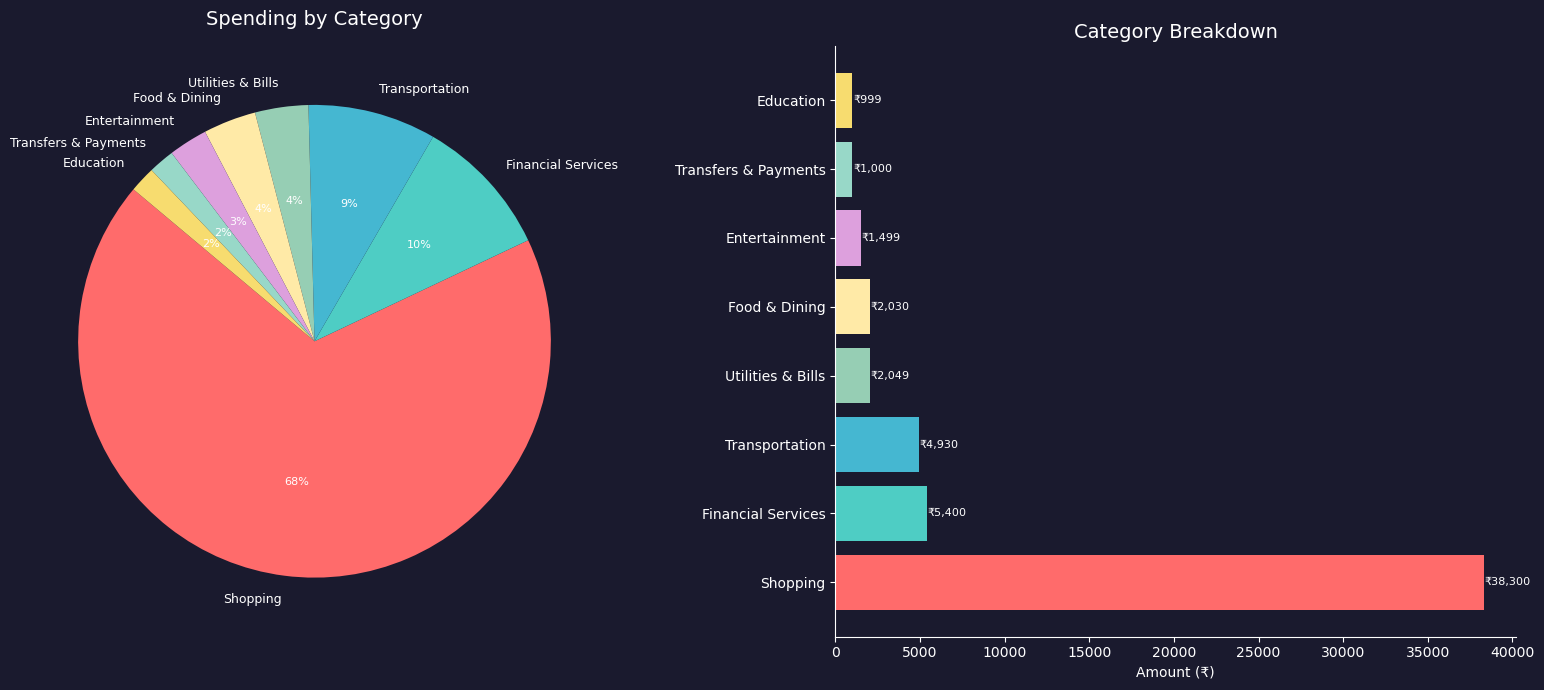

Chart saved!


In [11]:
import tempfile
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from collections import defaultdict

summary = pipeline.get_summary(results)

print(f'📊 SPENDING SUMMARY')
print(f'{'='*50}')
print(f'Total Transactions: {summary["total_transactions"]}')
print(f'Total Spend:        ₹{summary["total_spend"]:,.0f}')
print(f'Split Transactions: {summary["split_transactions"]}')
print(f'Needs Review:       {summary["needs_review_count"]}')

print(f'\n💳 SUBSCRIPTIONS DETECTED:')
for sub in summary['subscriptions']:
    print(f'  🔄 {sub["merchant"]:20s}  ₹{sub["amount"]:,.0f}')

# ── Pie Chart ─────────────────────────────────────────────────────────
# Group by main category
cat_totals = defaultdict(float)
for key, data in summary['categories'].items():
    main_cat = key.split(' > ')[0]
    cat_totals[main_cat] += data['total']

# Sort and take top 8
sorted_cats = sorted(cat_totals.items(), key=lambda x: x[1], reverse=True)[:8]
labels = [c[0] for c in sorted_cats]
values = [c[1] for c in sorted_cats]

colors = ['#FF6B6B','#4ECDC4','#45B7D1','#96CEB4','#FFEAA7','#DDA0DD','#98D8C8','#F7DC6F']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
fig.patch.set_facecolor('#1a1a2e')

# Pie chart
ax1.set_facecolor('#1a1a2e')
wedges, texts, autotexts = ax1.pie(
    values, labels=labels, autopct='%1.0f%%',
    colors=colors[:len(labels)], startangle=140,
    textprops={'color': 'white', 'fontsize': 9}
)
for at in autotexts:
    at.set_fontsize(8)
ax1.set_title('Spending by Category', color='white', fontsize=14, pad=15)

# Bar chart
ax2.set_facecolor('#1a1a2e')
bars = ax2.barh(labels, values, color=colors[:len(labels)])
ax2.set_xlabel('Amount (₹)', color='white')
ax2.set_title('Category Breakdown', color='white', fontsize=14)
ax2.tick_params(colors='white')
ax2.spines['bottom'].set_color('white')
ax2.spines['left'].set_color('white')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

for bar, val in zip(bars, values):
    ax2.text(bar.get_width() + 50, bar.get_y() + bar.get_height()/2,
             f'₹{val:,.0f}', va='center', ha='left', color='white', fontsize=8)

plt.tight_layout()
plt.savefig(os.path.join(tempfile.gettempdir(), 'spending_summary.png'), dpi=150, bbox_inches='tight',
            facecolor='#1a1a2e')
plt.show()
print('Chart saved!')

## 🏦 Step 12: Integration — Parse Real Bank SMS / Statement

In [12]:
# Example: Parse HDFC Bank SMS format
# In production, connect to SMS reader or bank API

import re

SAMPLE_SMS = [
    'HDFC Bank: Rs.450.00 debited from A/c XX1234 on 15-Jan-24 to VPA ZOMATO@ICICI Ref No 456789. Avl Bal:Rs.12,340.50',
    'HDFC Bank: Rs.649.00 debited from A/c XX1234 on 15-Jan-24 to VPA NETFLIX@AXISBANK Ref No 789012. Avl Bal:Rs.11,691.50',
    'SBI: Your A/c XX5678 is debited by Rs.1,200.00 on 16/01/24 to BIGBASKET ORDER. Available balance is Rs 45,230.00',
]

def parse_hdfc_sms(sms: str) -> dict:
    """Parse HDFC Bank debit SMS."""
    amount_match = re.search(r'Rs\.?([\d,]+(?:\.\d+)?)', sms)
    desc_match = re.search(r'to (?:VPA )?([A-Z0-9@]+)', sms, re.I)
    date_match = re.search(r'on (\d{2}-\w{3}-\d{2}|\d{2}/\d{2}/\d{2})', sms)
    
    amount = float(amount_match.group(1).replace(',','')) if amount_match else 0
    description = desc_match.group(1).replace('@', ' ').replace('ICICI', '').strip() if desc_match else sms[:30]
    date = date_match.group(1) if date_match else '2024-01-15'
    
    return {'description': description, 'amount': amount, 'date': str(date)}

print('PARSING BANK SMS MESSAGES')
print('=' * 50)
for i, sms in enumerate(SAMPLE_SMS):
    parsed = parse_hdfc_sms(sms)
    txn = Transaction(f'SMS_{i+1}', parsed['date'], parsed['description'], parsed['amount'])
    result = pipeline.process(txn)
    print(f'\nSMS: {sms[:60]}...')
    print(f'  Parsed:   {parsed["description"]} | ₹{parsed["amount"]:,.0f}')
    print(f'  Category: {result.category} > {result.subcategory} ({result.categorization_confidence:.0%})')
    print(f'  Merchant: {result.merchant_name} | Charge: {result.charge_type}')

PARSING BANK SMS MESSAGES

SMS: HDFC Bank: Rs.450.00 debited from A/c XX1234 on 15-Jan-24 to...
  Parsed:   ZOMATO | ₹450
  Category: Food & Dining > Restaurants (95%)
  Merchant: Zomato | Charge: variable

SMS: HDFC Bank: Rs.649.00 debited from A/c XX1234 on 15-Jan-24 to...
  Parsed:   NETFLIX AXISBANK | ₹649
  Category: Entertainment > OTT Subscriptions (95%)
  Merchant: Netflix | Charge: subscription

SMS: SBI: Your A/c XX5678 is debited by Rs.1,200.00 on 16/01/24 t...
  Parsed:   BIGBASKET | ₹1,200
  Category: Food & Dining > Groceries (95%)
  Merchant: BigBasket | Charge: variable


## 🔌 Step 13: API-Ready Usage

When integrating into your main project, use the pipeline as a service:

In [13]:
# ── INTEGRATION INTERFACE ──────────────────────────────────────────────
# This is what you call from your main application

def categorize_transaction_api(description: str, amount: float,
                                date: str = '2024-01-01',
                                line_items: list = None) -> dict:
    """
    Drop-in API function for your main project.
    
    Args:
        description: Raw transaction description from bank
        amount: Transaction amount in INR
        date: Transaction date YYYY-MM-DD
        line_items: Optional [{"name": ..., "amount": ...}] for split handling
    
    Returns:
        dict with full categorization + enrichment
    """
    import hashlib
    txn_id = hashlib.md5(f'{description}{amount}'.encode()).hexdigest()[:8]
    txn = Transaction(txn_id, date, description, amount, line_items=line_items)
    result = pipeline.process(txn)
    return result.to_dict()


# ── EXAMPLE CALL ──────────────────────────────────────────────────────
import json

# Simple transaction
result = categorize_transaction_api('NETFLIX SUBSCRIPTION MONTHLY', 649.0)
print('API Response (simplified):')
print(json.dumps({
    'category': result['category'],
    'subcategory': result['subcategory'],
    'confidence': result['categorization_confidence'],
    'merchant': result['merchant_name'],
    'charge_type': result['charge_type'],
    'is_subscription': result['is_subscription'],
    'tags': result['tags']
}, indent=2))

# Amazon order with line items
result2 = categorize_transaction_api(
    'AMAZON ORDER #123-456-789',
    amount=4599.0,
    line_items=[
        {'name': 'JBL Wireless Earphones', 'amount': 2999.0},
        {'name': 'Cotton T-Shirt 2-Pack', 'amount': 899.0},
        {'name': 'Protein Powder Chocolate', 'amount': 701.0},
    ]
)
print('\nAmazon Split Transaction:')
print(f'  Is Split: {result2["is_split"]}')
if result2['split_items']:
    for item in result2['split_items']:
        print(f'  ├─ {item["description"]:30s}  ₹{item["amount"]:>7,.0f}  → {item["category"]}')

API Response (simplified):
{
  "category": "Entertainment",
  "subcategory": "OTT Subscriptions",
  "confidence": 0.95,
  "merchant": "Netflix",
  "charge_type": "subscription",
  "is_subscription": true,
  "tags": [
    "recurring",
    "subscription"
  ]
}

Amazon Split Transaction:
  Is Split: False
